# Importation des bibliothéques

In [118]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# 1. Chargement des données

## 1.2. Données APEC

In [159]:
df = pd.read_csv('Scrapped_Data/Merge_data_cybSec_ancienne/Apec_data_total_merged_filred_cleaned.csv')
df

,entreprise,type_contrat,date_publication,date_mise_a_jour,salaire,prise_de_poste,experience,metier,statut_du_poste,zone_de_deplacement,...,profil_recherche,langues,savoir_etre,savoir_faire,descriptif_entreprise,nombre_posts,duree,ville,code_postal,departement
0,AI&Data,CDI,2024-02-01,2024-02-01,NaN,Dès que possible,2,Data analyst,Cadre du secteur privé,Nationale,...,De formation supérieure en statistiques et mat...,['Aucune langue attendue'],"['Capacité à prendre des décisions', ""Capacité...","['Algorithme', 'Amazon Web Services', 'Base de...",AI&Data est une Agence Data sur trois domaines...,1,NaN,Boulogne-Billancourt,92,Hauts-de-Seine
1,BLUE CONSULTING,CDI,2023-11-29,2024-01-17,55.0,02/01/2024,5,Data analyst,Cadre du secteur privé,Régionale,...,Savoir-être :\n- Avoir le sens de l écoute et ...,['Aucune langue attendue'],"[""Capacité d'analyse"", 'Capacité d’écoute', 'C...","['Analyse de données', 'Analyse technique', 'D...","La société BLUE CONSULTING, Entreprise de serv...",1,NaN,Levallois-Perret,92,Hauts-de-Seine
2,CAF Hauts-de-Seine,CDI,2024-02-07,2024-02-07,34.0,Dès que possible,0,Data analyst,Cadre du secteur privé,Nationale,...,Un niveau bac+ 3 souhaité dans le domaine écon...,['Aucune langue attendue'],['Aucun savoir-être attendu'],"['Analyse de données', 'Analyse financière', '...","La Caf des Hauts-de-Seine, c’est...\n630 colla...",1,NaN,Nanterre,92,Hauts-de-Seine
3,Avanade,CDI,2024-01-16,2024-01-16,65.0,Dès que possible,7,Chief Data Officer,Cadre du secteur privé,Régionale,...,De façon concrète \n En tant que Manager Data ...,"['Français', 'Anglais']","[""Esprit d'équipe"", 'Leadership']","['Communication', 'Gestion de projet', 'Règlem...","Avanade France, des experts Microsoft et ses p...",1,NaN,Issy-les-Moulineaux,92,Hauts-de-Seine
4,Lydia CHERFI,CDI,2024-01-24,2024-01-24,NaN,Dès que possible,4,Data analyst,Cadre du secteur privé,Nationale,...,Vous avez acquis au moins 4 ans des compétence...,['Aucune langue attendue'],['Aucun savoir-être attendu'],['Aucun savoir-faire attendu'],"MAKE IT HAPPEN - Depuis 2001, PREREQUIS mise s...",1,NaN,Neuilly-sur-Seine,92,Hauts-de-Seine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,MICHAEL PAGE INTERNATIONAL FRANCE,CDI,2024-03-16,2024-03-16,52.5,Dès que possible,0,Responsable sécurité informatique,Cadre du secteur privé,Pas de déplacement,...,Ingénieur ou issu d'une formation supérieure (...,['Aucune langue attendue'],"[""Esprit d'équipe"", 'Rigueur', ""Sens de l'orga...","['Administration système et réseau', 'Analyse ...",Le SDIS 42 (Service Départemental d'Incendie e...,1,NaN,Saint-Étienne,42,Loire
3680,Siléane Saint-Etienne,CDI,2024-03-05,2024-03-07,NaN,Dès que possible,5,Développeur,Cadre du secteur privé,Union Européenne,...,Votre profil\n Vous avez obtenu un diplôme en...,['Aucune langue attendue'],"['Autonomie', 'Capacité de communication', 'Fo...","['C sharp', 'C++', 'Management des personnes',...","SILEANE spécialiste en ROBOTIQUE et VISION, en...",1,NaN,Saint-Étienne,42,Loire
3681,AKKODIS CLERMONT-FERRAND,CDI,2024-03-07,2024-03-07,NaN,Dès que possible,3,Ingénieur système,Cadre du secteur privé,Pas de déplacement,...,Votre profil:\nDe formation supérieure en écol...,['Anglais'],"['Agilité', 'Ambition', 'Audace', 'Créativité'...","['Réseau électrique', 'Accompagnement du clien...","Akkodis, est un acteur mondial de l'ingénierie...",1,NaN,Roanne,42,Loire
3682,EURENCO,CDI,2024-02-19,2024-02-19,46.0,Dès que possible,0,Architecte infrastructures,Cadre du secteur privé,Pas de déplacement,...,De formation supérieure en Informatique (BAC+3...,['Aucune langue attendue'],"['Autonomie', 'Dynamisme', ""Esprit d'équipe"", ...","['Qualité', 'Archivage', 'Certification ITIL',...",Leader européen dans le domaine des explosifs ...,1,NaN,Bergerac,24,Dordogne


In [47]:
df.shape

(3684, 23)

In [160]:
df.dtypes

entreprise                object
type_contrat              object
date_publication          object
date_mise_a_jour          object
salaire                  float64
prise_de_poste            object
experience                 int64
metier                    object
statut_du_poste           object
zone_de_deplacement       object
secteur_d_activite        object
Teletravail               object
descriptif_poste          object
profil_recherche          object
langues                   object
savoir_etre               object
savoir_faire              object
descriptif_entreprise     object
nombre_posts               int64
duree                     object
ville                     object
code_postal               object
departement               object
dtype: object

In [161]:
df.isna().sum()

entreprise                  0
type_contrat                0
date_publication            0
date_mise_a_jour            0
salaire                  1787
prise_de_poste              0
experience                  0
metier                      0
statut_du_poste             0
zone_de_deplacement         0
secteur_d_activite          0
Teletravail              1919
descriptif_poste            0
profil_recherche            0
langues                     0
savoir_etre                 0
savoir_faire                0
descriptif_entreprise       0
nombre_posts                0
duree                    3462
ville                       0
code_postal                 0
departement                 0
dtype: int64

### Remplacer les valeurs NaN de l'attribut "salaire" avec la moyenne correspondante pour chaque département

In [162]:
moyenne_salaire_par_departement = df.groupby("departement")["salaire"].mean().reset_index()
moyenne_salaire_par_departement.isna().sum()

departement     0
salaire        10
dtype: int64

### Remplacer les valeurs NaN par la moyenne générale des salaires

In [163]:
moyenne_generale_salaire = df["salaire"].mean()
moyenne_salaire_par_departement["salaire"].fillna(moyenne_generale_salaire, inplace=True)
moyenne_salaire_par_departement


,departement,salaire
0,Ain,48.700000
1,Allier,47.728255
2,Alpes-Maritimes,43.476562
3,Ardèche,42.666667
4,Ariège,47.728255
...,...,...
81,Vendée,45.772727
82,Vienne,35.000000
83,Vosges,41.250000
84,Yonne,47.728255


In [164]:
for dep in moyenne_salaire_par_departement["departement"].unique() :
    mask = df["departement"] == dep
    new_salaire = moyenne_salaire_par_departement.loc[moyenne_salaire_par_departement["departement"] == dep, "salaire"].iloc[0]
    df.loc[mask, "salaire"] = df.loc[mask, "salaire"].fillna(new_salaire)

df.isna().sum()

entreprise                  0
type_contrat                0
date_publication            0
date_mise_a_jour            0
salaire                     0
prise_de_poste              0
experience                  0
metier                      0
statut_du_poste             0
zone_de_deplacement         0
secteur_d_activite          0
Teletravail              1919
descriptif_poste            0
profil_recherche            0
langues                     0
savoir_etre                 0
savoir_faire                0
descriptif_entreprise       0
nombre_posts                0
duree                    3462
ville                       0
code_postal                 0
departement                 0
dtype: int64

## 2.2. Taux de chomâge

In [125]:
df_chomage = pd.read_csv('Scrapped_Data/taux_chomage.csv')
df_chomage.drop(columns=['Unnamed: 0'], inplace=True)
df_chomage

,departement,3ᵉ trim. 2023 (p),2ᵉ trim. 2023,3ᵉ trim. 2022
0,Ain,"5,7","5,4","5,4"
1,Aisne,"10,6","10,3","10,3"
2,Allier,"7,9","7,7","7,6"
3,Alpes-de-Haute-Provence,"8,3","8,0","8,3"
4,Hautes-Alpes,"6,7","6,5","6,8"
...,...,...,...,...
97,Guadeloupe,"17,4","19,4","18,3"
98,Martinique,"9,9","10,6","13,3"
99,Guyane,"12,4","13,2","14,1"
100,La Réunion,"20,2","18,6","17,6"


In [126]:
df_chomage.dtypes

departement          object
3ᵉ trim. 2023 (p)    object
2ᵉ trim. 2023        object
3ᵉ trim. 2022        object
dtype: object

In [127]:
df_chomage['3ᵉ trim. 2023 (p)'] = df_chomage['3ᵉ trim. 2023 (p)'].str.replace(',', '.').astype(float)
df_chomage['2ᵉ trim. 2023'] = df_chomage['2ᵉ trim. 2023'].str.replace(',', '.').astype(float)
df_chomage['3ᵉ trim. 2022'] = df_chomage['3ᵉ trim. 2022'].str.replace(',', '.').astype(float)

In [128]:
df_chomage.dtypes

departement           object
3ᵉ trim. 2023 (p)    float64
2ᵉ trim. 2023        float64
3ᵉ trim. 2022        float64
dtype: object

In [135]:
df_chomage

,departement,3ᵉ trim. 2023 (p),2ᵉ trim. 2023,3ᵉ trim. 2022
0,Ain,5.7,5.4,5.4
1,Aisne,10.6,10.3,10.3
2,Allier,7.9,7.7,7.6
3,Alpes-de-Haute-Provence,8.3,8.0,8.3
4,Hautes-Alpes,6.7,6.5,6.8
...,...,...,...,...
97,Guadeloupe,17.4,19.4,18.3
98,Martinique,9.9,10.6,13.3
99,Guyane,12.4,13.2,14.1
100,La Réunion,20.2,18.6,17.6


## 2.3. Données sur la population

In [137]:
df_pop = pd.read_csv('Scrapped_Data/data_Pop.csv')
df_pop[['departement', 'code_postal', 'Région']] = df_pop['departement/code_postal/Région'].str.extract(r'^(.*?)\((\d+)\)\[(.*?)\]$')
df_pop.drop(columns=['departement/code_postal/Région'], inplace=True)
df_pop

,Superficie [en km²],Population,Densite [hab. /km²],departement,code_postal,Région
0,86 504,230 000,4,Guyane,973,Guyane
1,10 000,1 376 000,138,Gironde,33,Aquitaine
2,9 243,327 334,35,Landes,40,Aquitaine
3,9 060,401 500,43,Dordogne,24,Aquitaine
4,8 763,506 755,58,Côte-d'Or,21,Bourgogne
...,...,...,...,...,...,...
95,609,137 408,225,Territoire-de-Belfort,90,Franche-Comté
96,245,1 279 000,5 220,Val-de-Marne,94,Île-de-France
97,236,1 485 000,6 292,Seine-Saint-Denis,93,Île-de-France
98,176,1 517 000,8 619,Hauts-de-Seine,92,Île-de-France


In [143]:
df_pop['Superficie [en km²]'] = df_pop['Superficie [en km²]'].str.replace('\xa0', '').astype(int)
df_pop['Population'] = df_pop['Population'].str.replace('\xa0', '').astype(int)
df_pop['Densite [hab. /km²]'] = df_pop['Densite [hab. /km²]'].str.replace('\xa0', '').astype(int)
df_pop.dtypes

Superficie [en km²]     int64
Population              int64
Densite [hab. /km²]     int64
departement            object
code_postal            object
Région                 object
dtype: object

## 2.4. Taux de pauvrete

In [153]:
df_pauvrete = pd.read_csv('Scrapped_Data/taux_pauvrete.csv')
df_pauvrete.drop(columns=['Unnamed: 0'], inplace=True)
df_pauvrete

,departement,taux de pauvrete total,Moins de 30 ans,30-39 ans,40-49 ans,50-59 ans,60-74 ans,75 ans ou plus
0,Ain,"10,8","15,0","11,8","12,1","10,3","8,4","8,3"
1,Aisne,"18,8","30,4","23,3","21,2","17,7","13,6","10,8"
2,Allier,"16,2","24,8","20,5","18,3","16,1","12,2","12,2"
3,Alpes-de-Haute-Provence,"17,1","24,2","20,7","20,1","17,2","13,8","12,9"
4,Hautes-Alpes,"14,7","22,0","17,4","16,9","14,7","11,4","11,2"
...,...,...,...,...,...,...,...,...
94,Val-de-Marne,"17,2","22,5","17,9","19,4","17,5","14,2","10,6"
95,Val-d'Oise,"17,7","21,9","19,3","20,6","17,3","13,6","10,5"
96,France métropolitaine,"14,9","22,7","17,0","16,7","14,4","11,5","11,0"
97,Martinique,"26,8","46,3","34,1","27,1","25,4","22,4","29,3"


In [154]:
df_pauvrete.dtypes

departement               object
taux de pauvrete total    object
Moins de 30 ans           object
30-39 ans                 object
40-49 ans                 object
50-59 ans                 object
60-74 ans                 object
75 ans ou plus            object
dtype: object

In [155]:
df_pauvrete['taux de pauvrete total'] = df_pauvrete['taux de pauvrete total'].str.replace(',', '.').astype(float)
df_pauvrete['Moins de 30 ans'] = df_pauvrete['Moins de 30 ans'].str.replace(',', '.').astype(float)
df_pauvrete['30-39 ans'] = df_pauvrete['30-39 ans'].str.replace(',', '.').astype(float)
df_pauvrete['40-49 ans'] = df_pauvrete['40-49 ans'].str.replace(',', '.').astype(float)
df_pauvrete['50-59 ans'] = df_pauvrete['50-59 ans'].str.replace(',', '.').astype(float)
df_pauvrete['60-74 ans'] = df_pauvrete['60-74 ans'].str.replace(',', '.').astype(float)
df_pauvrete['75 ans ou plus'] = df_pauvrete['75 ans ou plus'].str.replace(',', '.').astype(float)
df_pauvrete.dtypes

departement                object
taux de pauvrete total    float64
Moins de 30 ans           float64
30-39 ans                 float64
40-49 ans                 float64
50-59 ans                 float64
60-74 ans                 float64
75 ans ou plus            float64
dtype: object

## 2.5. Données sur le logement

In [105]:
logement_df = pd.read_csv("Open Data/donnees_departements_Logement.csv")
logement_df

,No,departement,Nombre de logements sociaux pour 10 000 habitants,Part des logements sociaux de type individuel (en %),Part des logements sociaux de type collectif (en %),Loyer moyen par mètre carré de surface habitable (en €)
0,01,Ain,727,16.8,83.2,6.23
1,02,Aisne,787,24.3,75.7,5.64
2,03,Allier,601,26.6,73.4,5.42
3,04,Alpes-de-Haute-Provence,469,27.3,72.7,6.10
4,05,Hautes-Alpes,569,12.8,87.2,5.44
...,...,...,...,...,...,...
98,971,Guadeloupe,998,22.0,78.0,6.42
99,972,Martinique,1005,0.4,99.6,5.87
100,973,Guyane,699,25.4,74.6,6.59
101,974,La Réunion,967,12.8,87.2,6.40


# 2. Analyse et exploration des données

### Distribution du nombre d'offres d’emploi par département

/tmp/ipykernel_57316/4214960457.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='departement', data = df , palette='husl')


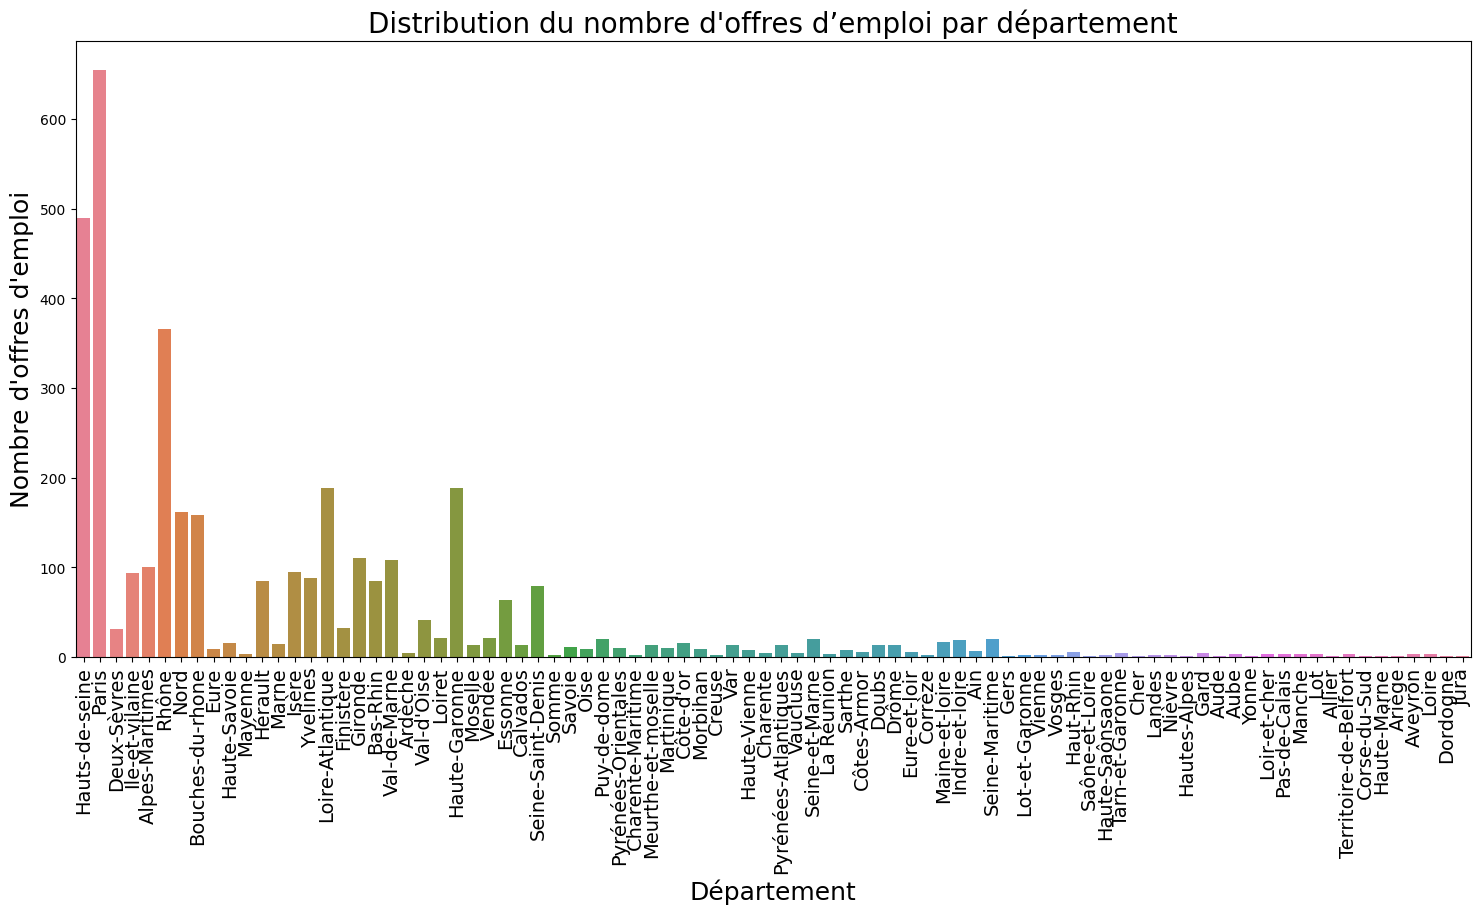

In [74]:
plt.figure(figsize=(18,8))

sns.countplot(x ='departement', data = df , palette='husl')
plt.title("Distribution du nombre d'offres d’emploi par département", fontsize=20)
plt.xlabel('Département', fontsize=18)
plt.ylabel("Nombre d'offres d'emploi", fontsize=18)
plt.xticks(fontsize=14, rotation=90)

plt.show()

/tmp/ipykernel_57316/4280066315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='metier', data = df , palette='husl')


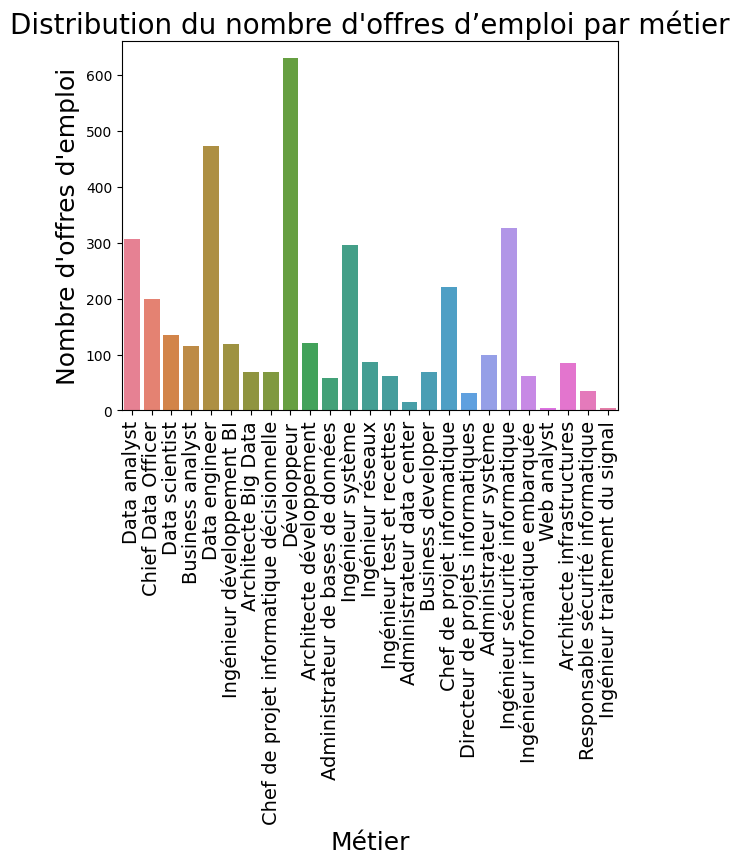

In [75]:
#plt.figure(figsize=(15,8))

sns.countplot(x ='metier', data = df , palette='husl')
plt.title("Distribution du nombre d'offres d’emploi par métier", fontsize=20)
plt.xlabel('Métier', fontsize=18)
plt.ylabel("Nombre d'offres d'emploi", fontsize=18)
plt.xticks(fontsize=14, rotation=90)

plt.show()

# On doit bien nettoyer cette colonne (on peut faire aprés un pie au lieu d'un hist)

/tmp/ipykernel_57316/1632570323.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='type_contrat', data = df , palette='husl')


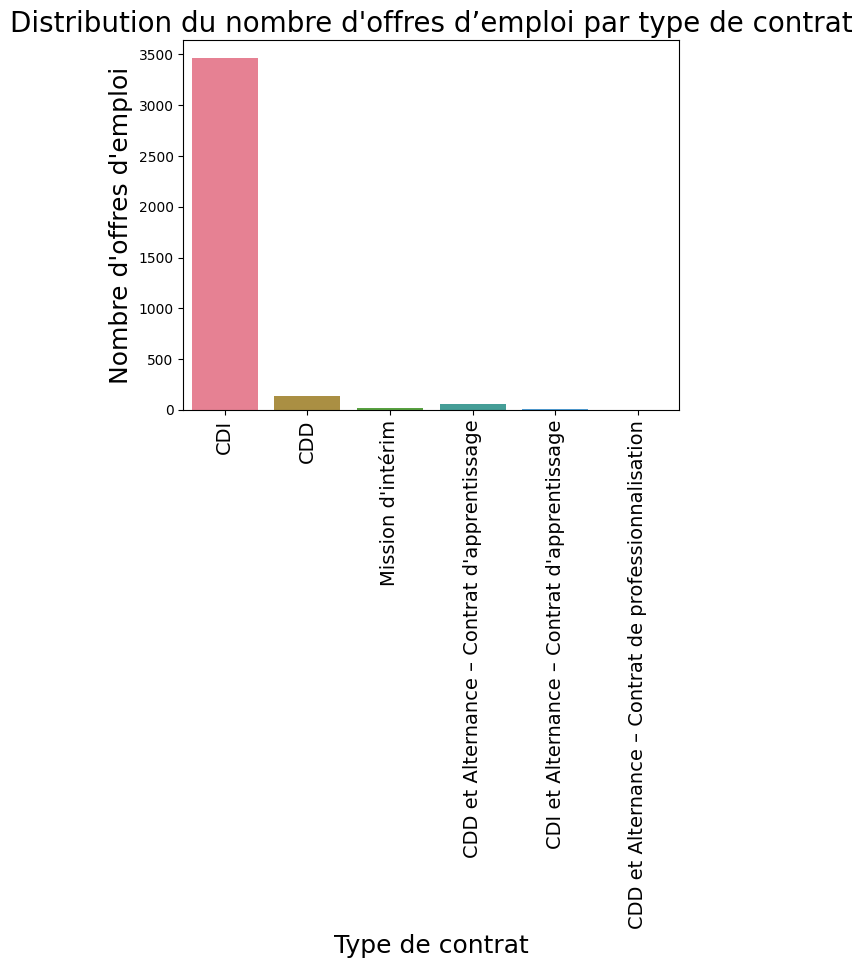

In [76]:
#plt.figure(figsize=(15,4))

sns.countplot(x ='type_contrat', data = df , palette='husl')
plt.title("Distribution du nombre d'offres d’emploi par type de contrat", fontsize=20)
plt.xlabel('Type de contrat', fontsize=18)
plt.ylabel("Nombre d'offres d'emploi", fontsize=18)
plt.xticks(fontsize=14, rotation=90)

plt.show()

In [85]:
# # Calculer le nombre d'offres d'emploi par département
# counts = df['type_contrat'].value_counts()

# # Définir une palette de couleurs personnalisée
# colors = sns.color_palette('pastel')

# # Création du pie chart avec des couleurs personnalisées
# #plt.figure(figsize=(10, 10))
# plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
# plt.title("Répartition du nombre d'offres d’emploi par département")
# plt.axis('equal')  # Assure que le pie chart est dessiné sous forme de cercle
# plt.show()

In [77]:
moyenne_salaires = df.groupby('departement')['salaire'].mean().reset_index()
moyenne_salaires

,departement,salaire
0,Ain,48.700000
1,Allier,NaN
2,Alpes-Maritimes,43.476562
3,Ardèche,42.666667
4,Ariège,NaN
...,...,...
81,Vendée,45.772727
82,Vienne,35.000000
83,Vosges,41.250000
84,Yonne,NaN


Regarder apres la distribution des salire par type de métier

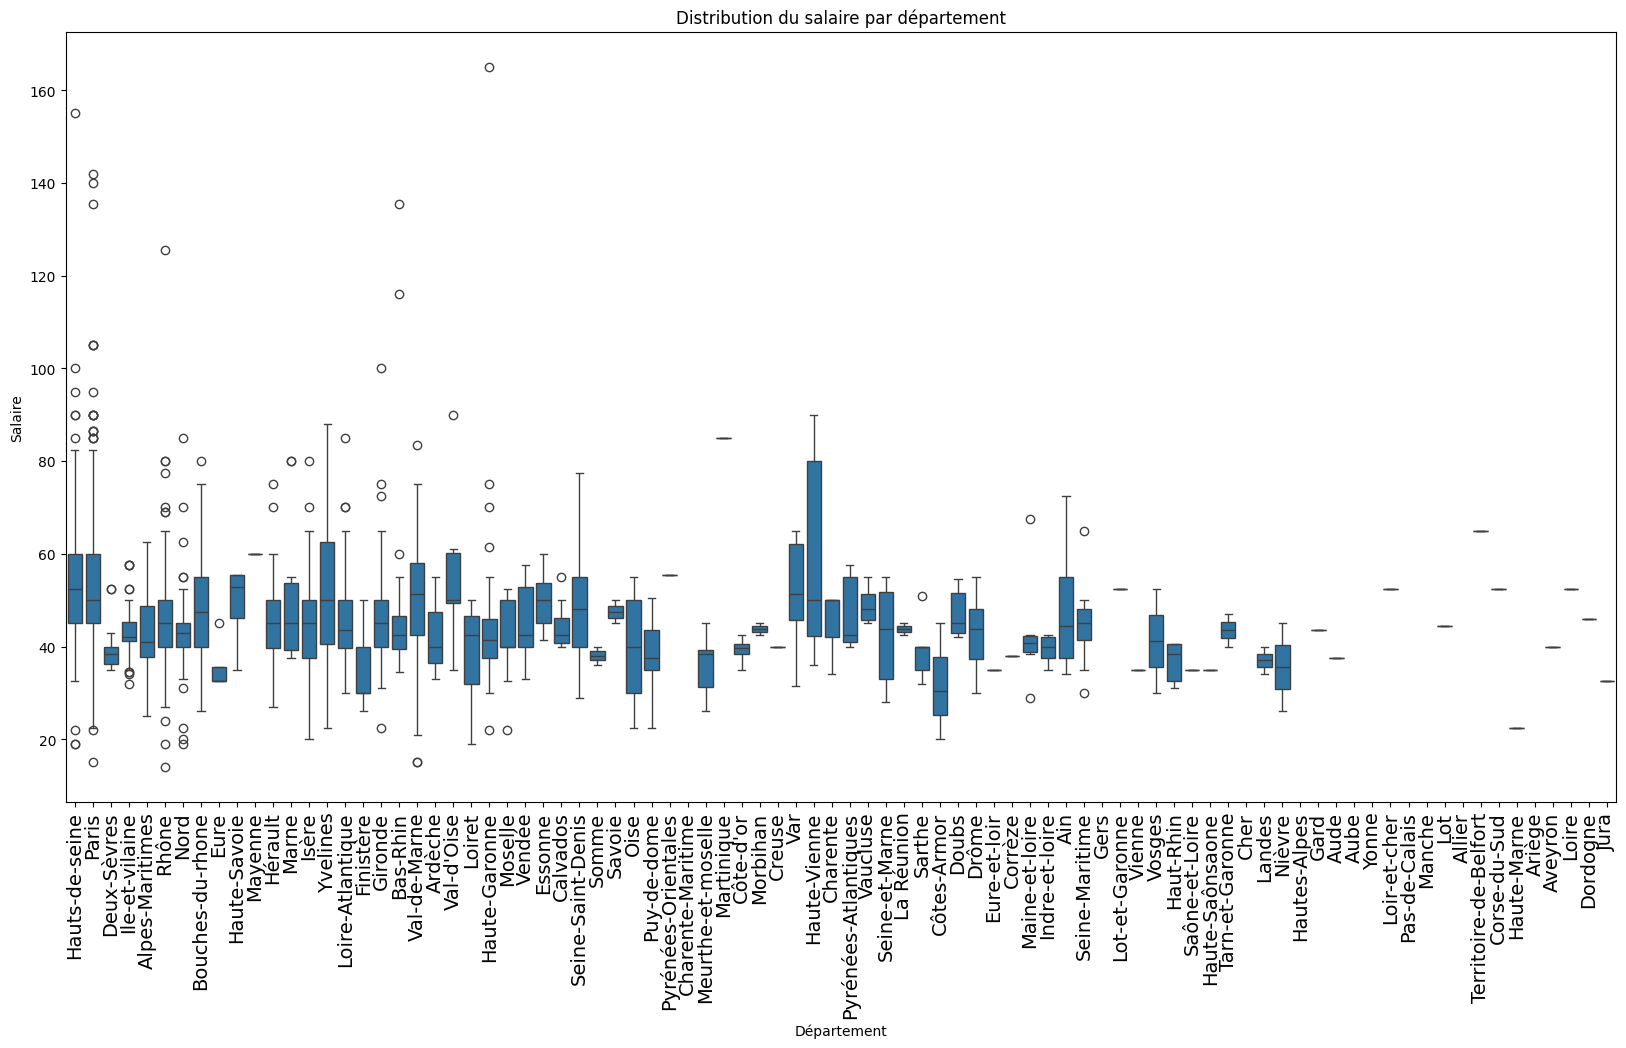

In [78]:
# Visualisation de la distribution du salaire par département avec un boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x='departement', y='salaire', data=df)
plt.title('Distribution du salaire par département')
plt.xlabel('Département')
plt.ylabel('Salaire')
plt.xticks(fontsize=14, rotation=90)
plt.show()

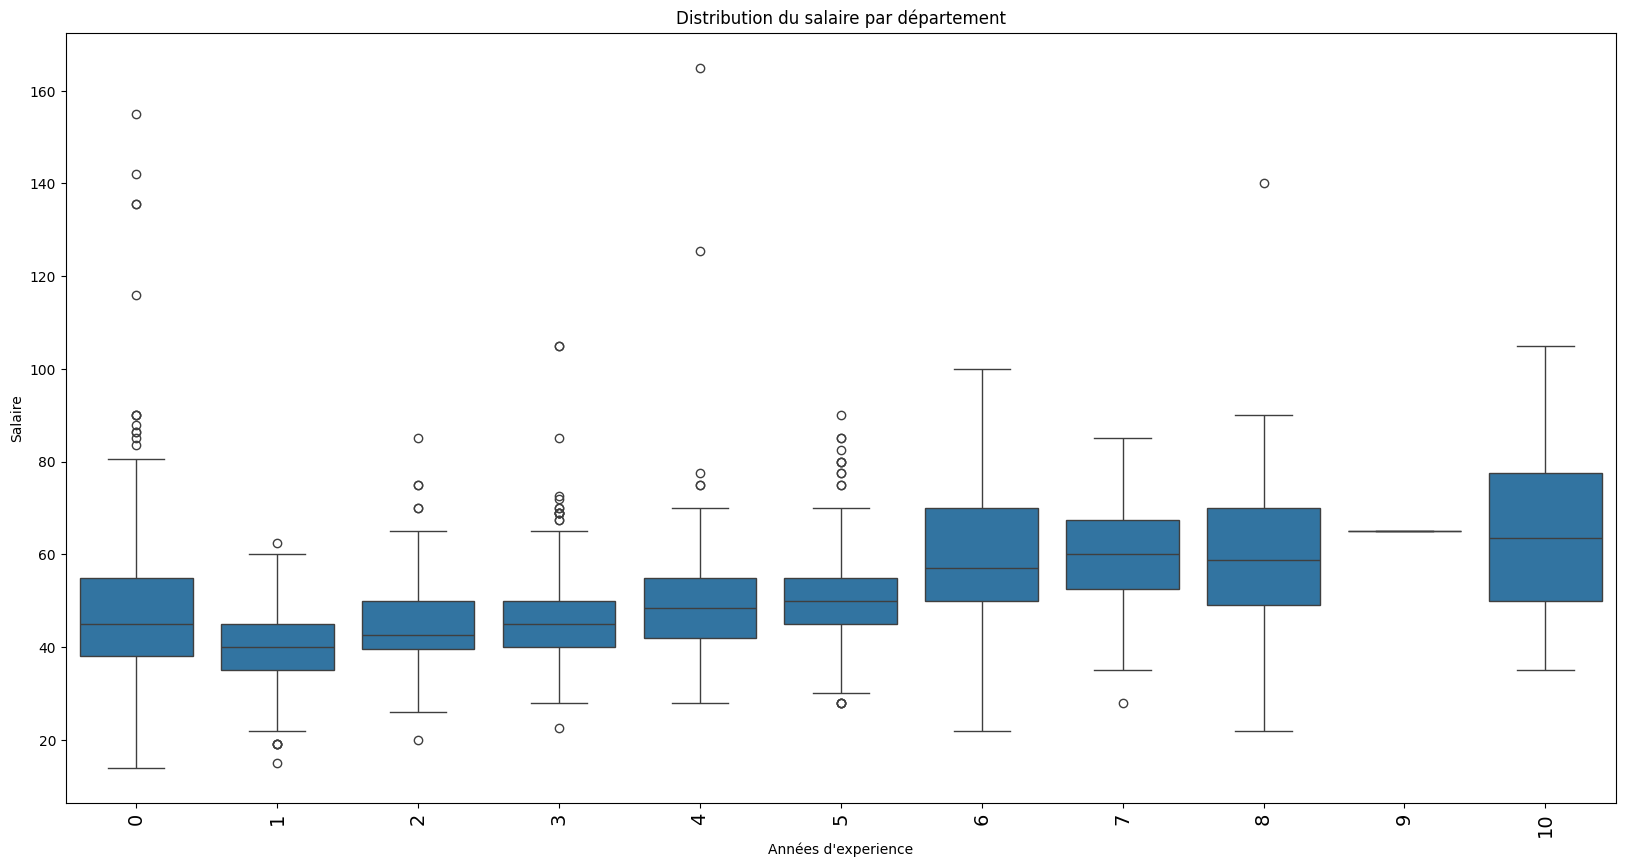

In [79]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='experience', y='salaire', data=df)
plt.title('Distribution du salaire par département')
plt.xlabel('Années d\'experience')
plt.ylabel('Salaire')
plt.xticks(fontsize=14, rotation=90)
plt.show()

In [80]:
df['Date'] = pd.to_datetime(df['date_publication'], format='%Y-%m-%d')
df['Mois_Annee'] = df['Date'].dt.strftime('%Y-%m')

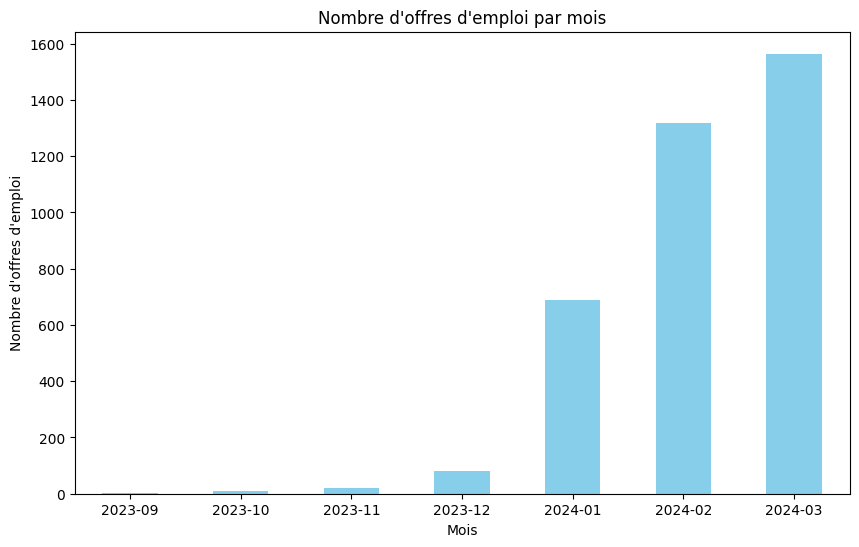

In [81]:

offres_par_mois = df['Mois_Annee'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
offres_par_mois.plot(kind='bar', color='skyblue')
plt.title('Nombre d\'offres d\'emploi par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre d\'offres d\'emploi')
plt.xticks(rotation=0)
plt.show()

In [82]:
len(df['entreprise'].unique())

1254

# 3. Analyse de corrélation

Il faut renettoyer les colone departement de chaque dataframe à faire à la main je pense

In [173]:
df_merged = df[["departement", "salaire"]].merge(df_chomage, on="departement", how="left")
df_merged = df_merged.merge(df_pop[["Superficie [en km²]"	,"Population"	,"Densite [hab. /km²]",	"departement"]], on="departement", how="left")
df_merged = df_merged.merge(df_pauvrete[["departement","taux de pauvrete total"]], on="departement", how="left")
df_merged = df_merged.merge(logement_df, on="departement", how="left")
df_merged

,departement,salaire,3ᵉ trim. 2023 (p),2ᵉ trim. 2023,3ᵉ trim. 2022,Superficie [en km²],Population,Densite [hab. /km²],taux de pauvrete total,No,Nombre de logements sociaux pour 10 000 habitants,Part des logements sociaux de type individuel (en %),Part des logements sociaux de type collectif (en %),Loyer moyen par mètre carré de surface habitable (en €)
0,Hauts-de-Seine,53.586124,5.9,5.7,5.8,176.0,1517000.0,8619.0,12.4,92,1263.0,0.9,99.1,7.55
1,Hauts-de-Seine,55.000000,5.9,5.7,5.8,176.0,1517000.0,8619.0,12.4,92,1263.0,0.9,99.1,7.55
2,Hauts-de-Seine,34.000000,5.9,5.7,5.8,176.0,1517000.0,8619.0,12.4,92,1263.0,0.9,99.1,7.55
3,Hauts-de-Seine,65.000000,5.9,5.7,5.8,176.0,1517000.0,8619.0,12.4,92,1263.0,0.9,99.1,7.55
4,Hauts-de-Seine,53.586124,5.9,5.7,5.8,176.0,1517000.0,8619.0,12.4,92,1263.0,0.9,99.1,7.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,Loire,52.500000,7.5,7.3,7.1,4781.0,732000.0,153.0,15.8,42,779.0,7.8,92.2,5.43
3680,Loire,52.500000,7.5,7.3,7.1,4781.0,732000.0,153.0,15.8,42,779.0,7.8,92.2,5.43
3681,Loire,52.500000,7.5,7.3,7.1,4781.0,732000.0,153.0,15.8,42,779.0,7.8,92.2,5.43
3682,Dordogne,46.000000,7.2,7.0,7.3,9060.0,401500.0,43.0,16.6,24,349.0,41.1,58.9,5.49


In [178]:
df_merged

,departement,salaire,3ᵉ trim. 2023 (p),2ᵉ trim. 2023,3ᵉ trim. 2022,Superficie [en km²],Population,Densite [hab. /km²],taux de pauvrete total,No,Nombre de logements sociaux pour 10 000 habitants,Part des logements sociaux de type individuel (en %),Part des logements sociaux de type collectif (en %),Loyer moyen par mètre carré de surface habitable (en €)
0,Hauts-de-Seine,53.586124,5.9,5.7,5.8,176.0,1517000.0,8619.0,12.4,92,1263.0,0.9,99.1,7.55
1,Hauts-de-Seine,55.000000,5.9,5.7,5.8,176.0,1517000.0,8619.0,12.4,92,1263.0,0.9,99.1,7.55
2,Hauts-de-Seine,34.000000,5.9,5.7,5.8,176.0,1517000.0,8619.0,12.4,92,1263.0,0.9,99.1,7.55
3,Hauts-de-Seine,65.000000,5.9,5.7,5.8,176.0,1517000.0,8619.0,12.4,92,1263.0,0.9,99.1,7.55
4,Hauts-de-Seine,53.586124,5.9,5.7,5.8,176.0,1517000.0,8619.0,12.4,92,1263.0,0.9,99.1,7.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,Loire,52.500000,7.5,7.3,7.1,4781.0,732000.0,153.0,15.8,42,779.0,7.8,92.2,5.43
3680,Loire,52.500000,7.5,7.3,7.1,4781.0,732000.0,153.0,15.8,42,779.0,7.8,92.2,5.43
3681,Loire,52.500000,7.5,7.3,7.1,4781.0,732000.0,153.0,15.8,42,779.0,7.8,92.2,5.43
3682,Dordogne,46.000000,7.2,7.0,7.3,9060.0,401500.0,43.0,16.6,24,349.0,41.1,58.9,5.49


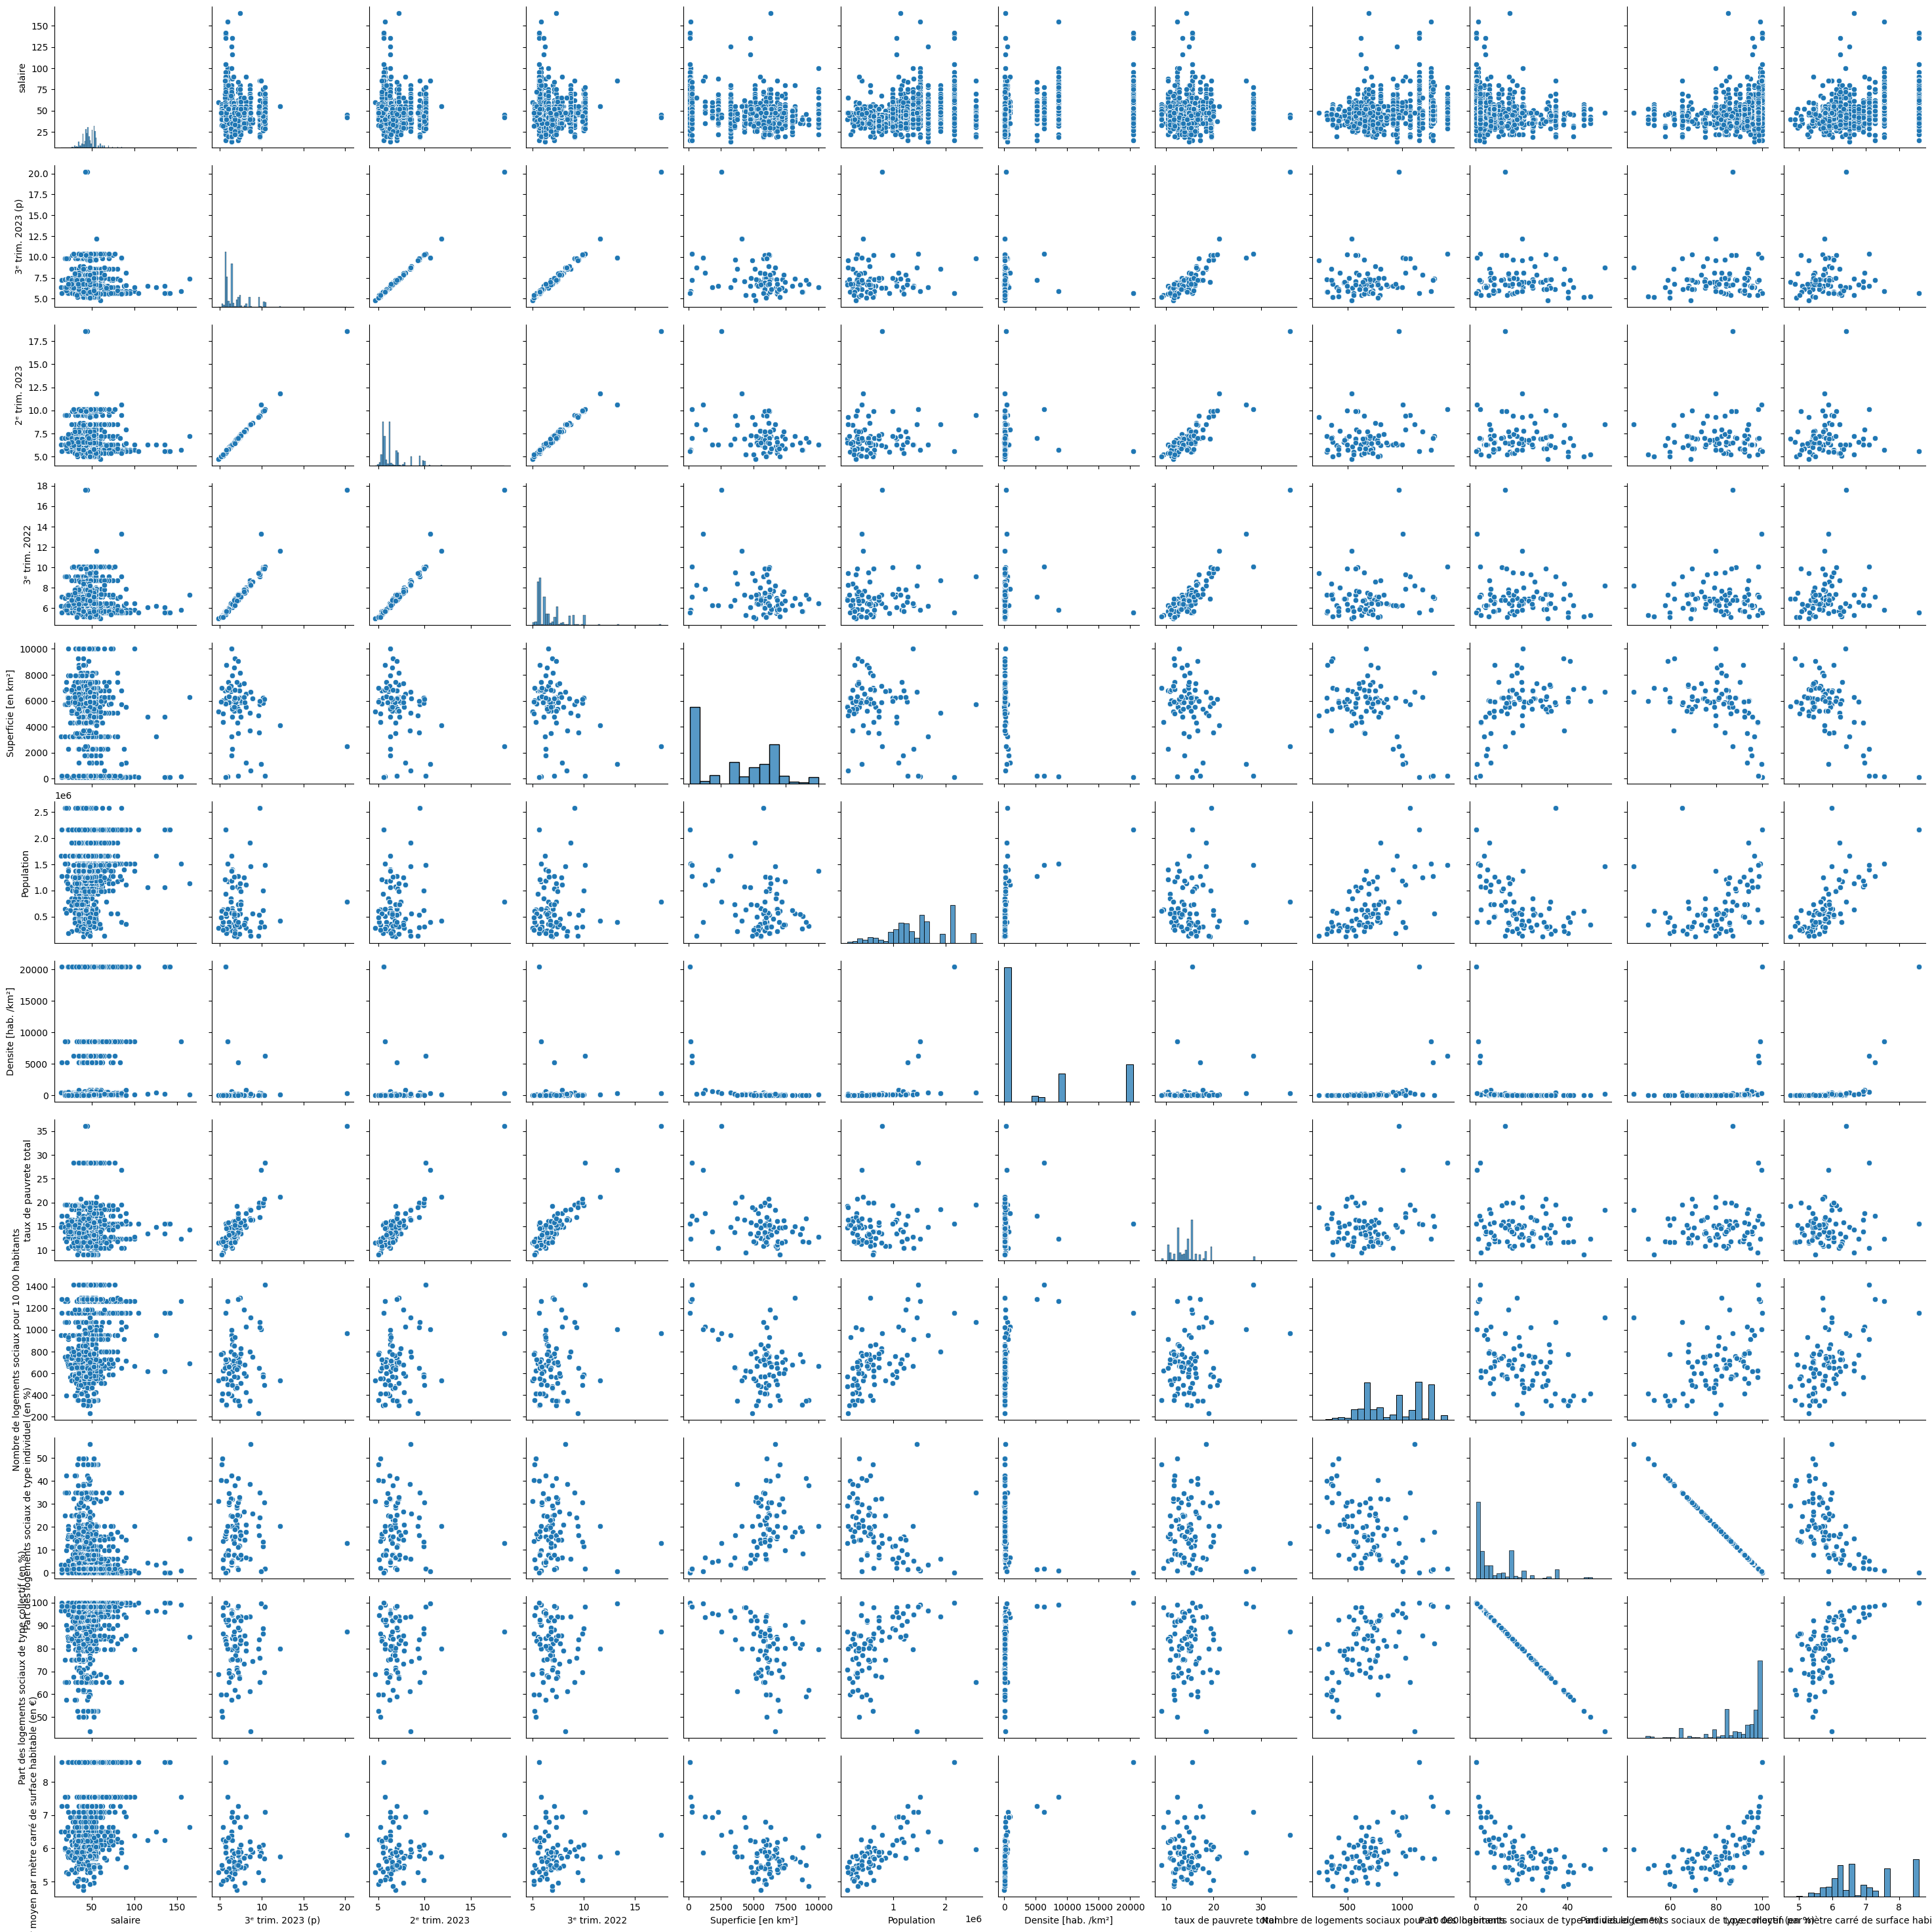

In [174]:
sns.pairplot(df_merged)

il y a des colonne qu'il faut rendre de type numérique 

In [175]:
colonnes_numeriques = df_merged.select_dtypes(include='number')
colonnes_numeriques

,salaire,3ᵉ trim. 2023 (p),2ᵉ trim. 2023,3ᵉ trim. 2022,Superficie [en km²],Population,Densite [hab. /km²],taux de pauvrete total,Nombre de logements sociaux pour 10 000 habitants,Part des logements sociaux de type individuel (en %),Part des logements sociaux de type collectif (en %),Loyer moyen par mètre carré de surface habitable (en €)
0,53.586124,5.9,5.7,5.8,176.0,1517000.0,8619.0,12.4,1263.0,0.9,99.1,7.55
1,55.000000,5.9,5.7,5.8,176.0,1517000.0,8619.0,12.4,1263.0,0.9,99.1,7.55
2,34.000000,5.9,5.7,5.8,176.0,1517000.0,8619.0,12.4,1263.0,0.9,99.1,7.55
3,65.000000,5.9,5.7,5.8,176.0,1517000.0,8619.0,12.4,1263.0,0.9,99.1,7.55
4,53.586124,5.9,5.7,5.8,176.0,1517000.0,8619.0,12.4,1263.0,0.9,99.1,7.55
...,...,...,...,...,...,...,...,...,...,...,...,...
3679,52.500000,7.5,7.3,7.1,4781.0,732000.0,153.0,15.8,779.0,7.8,92.2,5.43
3680,52.500000,7.5,7.3,7.1,4781.0,732000.0,153.0,15.8,779.0,7.8,92.2,5.43
3681,52.500000,7.5,7.3,7.1,4781.0,732000.0,153.0,15.8,779.0,7.8,92.2,5.43
3682,46.000000,7.2,7.0,7.3,9060.0,401500.0,43.0,16.6,349.0,41.1,58.9,5.49


<Axes: >

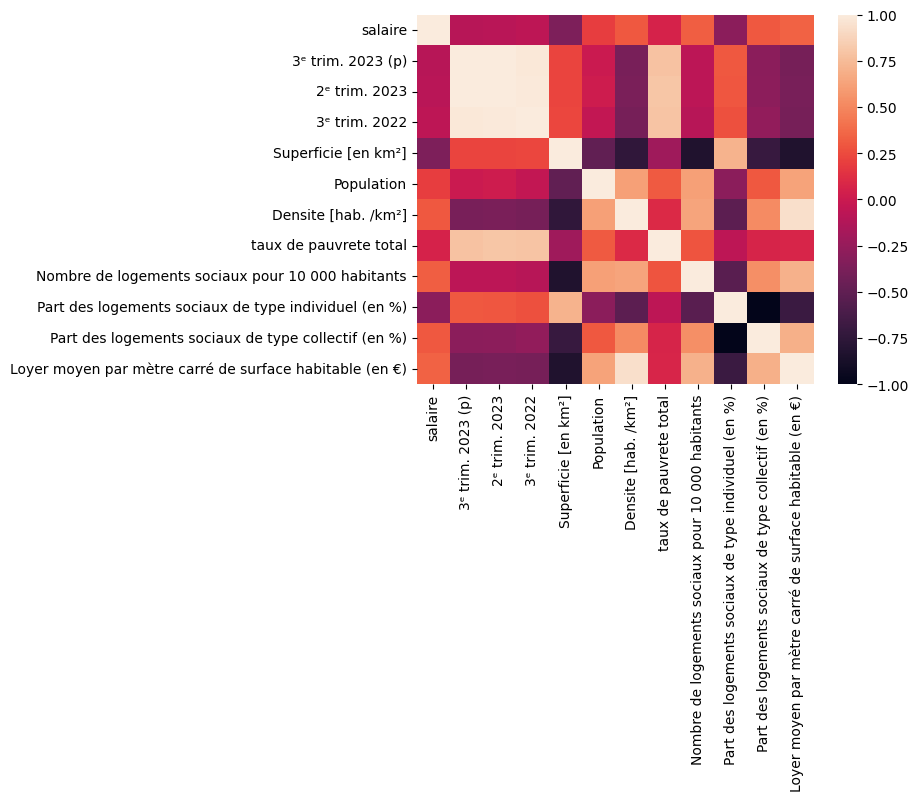

In [177]:
corr = colonnes_numeriques.corr()
sns.heatmap(corr)